### Apply SMOTE for upsampling the data

Use logistic regression to fit the model and compute the accuracy of the model.
Use decision tree classifier to fit the model and compute the accuracy of the model.
Compare the accuracies of the two models.

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as mk
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv("Customer-Churn.csv")
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [4]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Data Cleaning
here i did some basic cleaning like getting rid of empty values, cleaning nans, and splitting numeric


In [5]:
data["TotalCharges"] = data["TotalCharges"].replace(' ', np.nan)
data["TotalCharges"]= data["TotalCharges"].astype(float)

In [6]:
numeric = data.select_dtypes(include = np.number)
non_numeric = data.select_dtypes(exclude = np.number)

In [7]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
data['TotalCharges'].isna().sum() / len(data)

0.001561834445548772

In [10]:
data['TotalCharges']= data['TotalCharges'].replace(np.nan, data['TotalCharges'].mean())

### Feature Selection & Train Test Split
now I have to split the training and test and choose the features i want to feed the model

/var/folders/9g/0kknk5wn63q6t61d2hr_55440000gn/T/ipykernel_41845/3617385638.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr().apply(lambda x: round(x,2))


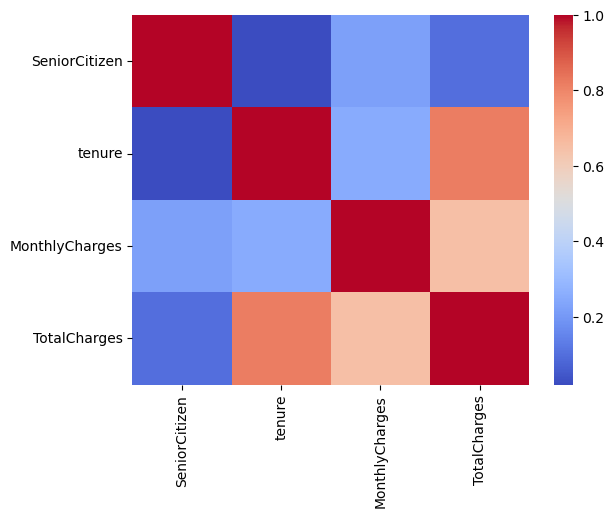

In [14]:
### I wanted to bring this part back

correlation_matrix = data.corr().apply(lambda x: round(x,2))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [15]:
features = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']

In [16]:
X_num = data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]


In [38]:
Y = data["Churn"]


0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [23]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(Y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.25, random_state=42) 

### Modelling
we choose the models and we run them through the iterable function

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [32]:
Logreg = LogisticRegression(random_state = 42)
dtc = DecisionTreeClassifier(random_state = 42)
classifiers = [Logreg, dtc]

In [35]:
def modeling(y, X, classifiers, test_size=0.25):
    for model in classifiers:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        model.fit(X_train, y_train )
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        # r2_adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        r2_adj =  1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
        RMSE = mean_squared_error(y_test, predictions, squared=False)
        MSE = mean_squared_error(y_test, predictions)
        MAE = mean_absolute_error(y_test, predictions)
        print(model, 'metrics are: '), print("R2 =", r2), print("R2 adjusted =", r2_adj), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
    return predictions, y_test, r2

In [39]:
modeling(y,X_num,classifiers, test_size=0.25)

LogisticRegression(random_state=42) metrics are: 
R2 = -0.003699855718654721
R2 adjusted = 0.7918738289217331
RMSE = 0.45
MSE = 0.2
MAE = 0.2
DecisionTreeClassifier(random_state=42) metrics are: 
R2 = -0.47974035871664533
R2 adjusted = 0.9195908444844375
RMSE = 0.54
MSE = 0.29
MAE = 0.29


(array([1, 0, 0, ..., 1, 1, 0]),
 array([1, 0, 0, ..., 0, 1, 0]),
 -0.47974035871664533)

In [31]:
predictions = Logreg.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

### Over Sampling
Now what we need to do is create new data, with the given data

In [47]:
from imblearn.over_sampling import SMOTE, ADASYN

smote = SMOTE(k_neighbors = 20)
X_train_SMOTE,y_train_SMOTE = smote.fit_resample(X_train,y_train)


In [48]:
modeling(y_train_SMOTE,X_train_SMOTE,classifiers, test_size = 0.25)

LogisticRegression(random_state=42) metrics are: 
R2 = -0.07939321968000135
R2 adjusted = 0.7248071797644249
RMSE = 0.52
MSE = 0.27
MAE = 0.27
DecisionTreeClassifier(random_state=42) metrics are: 
R2 = -0.19041652227565864
R2 adjusted = 0.9213367557290182
RMSE = 0.55
MSE = 0.3
MAE = 0.3


(array([0, 1, 1, ..., 0, 1, 0]),
 array([0, 0, 1, ..., 0, 1, 1]),
 -0.19041652227565864)

In [ ]:
## R 2 adjusted has improved in the decision tree with smote

### Under Sampling

In [44]:
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection # uses tomeklinks to remove noisy samples

tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train,y_train)



In [46]:
modeling(y_train_tomek,X_train_tomek,classifiers, test_size = 0.25)

LogisticRegression(random_state=42) metrics are: 
R2 = -0.09195350104441014
R2 adjusted = 0.7904525370720832
RMSE = 0.48
MSE = 0.23
MAE = 0.23
DecisionTreeClassifier(random_state=42) metrics are: 
R2 = -0.276564344746163
R2 adjusted = 0.9260177596368894
RMSE = 0.52
MSE = 0.27
MAE = 0.27


(array([1, 1, 0, ..., 0, 1, 0]),
 array([1, 1, 0, ..., 0, 1, 0]),
 -0.276564344746163)

In [ ]:
### Seems like Undersampling improves both models, we should use the Tomek Links for our data